In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.layers import layers_creation

In [3]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [4]:
camada = layers_creation(tamanho_rede=100,porosidade=0.9,
                         camadas=1,limite_tamanho_poro=20,CBM=True,
                         concentracao_cbm=0.1,tamanho_cbm=1,display=False)[0]

Filtro criado, 0.02


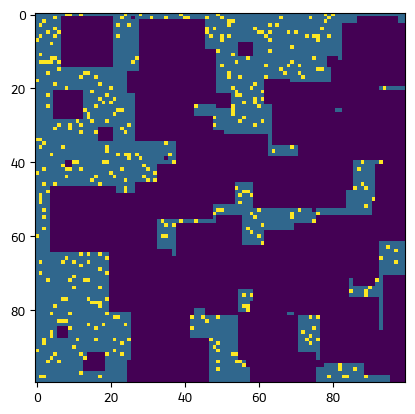

In [5]:
plt.imshow(camada)
plt.show()

In [24]:
def calcular_energia(rede):
    energia = 0
    tamanho = len(rede)
    for i in range(tamanho):
        for j in range(tamanho):
            S = rede[i, j]
            if S == 0:
                continue

            # Interacao Vizinhos
            vizinhos = [
                rede[(i+1) % tamanho, j],
                rede[i, (j+1) % tamanho],
                rede[(i-1) % tamanho, j],
                rede[i, (j-1) % tamanho]
            ]

            # Mudar forma de calcular a energia
            
            
            for V in vizinhos:
                if S == 1:  # CBM
                    if V == -1:  # CBM com MP
                        energia += E_CBMP
                    elif V == 2:  # CBM com espid
                        energia += E_CBMS
                    elif V == 1:  # CBM com CBM
                        energia += E_CBMCBM
                elif S == 2:  # Espid
                    if V == -1:  # Espid com MP
                        energia += E_SMP
                    elif V == 2:  # Espid com espid
                        energia += E_SS
                elif S == -1:  # MP
                    if V == -1:  # MP com MP
                        energia += E_MPMP
    
    return energia

In [76]:
def monte_carlo(rede, mps_count, passos, T, tamanho_limite_mp=50):
    
    tamanho = len(rede)
    
    for passo in range(passos):
        
        # Posicao aleatoria na rede
        i = np.random.randint(0, tamanho)
        j = np.random.randint(0, tamanho)
        tamanho_mp = np.random.randint(0, tamanho_limite_mp)
        S = rede[i, j]
        
        rede_teste = rede.copy()

        # Boundary
        if i+tamanho_mp < tamanho and j+tamanho_mp < tamanho:
            
            rede_teste[i:i+tamanho_mp,j:j+tamanho_mp] = 1

            energia_atual = calcular_energia(rede)
            energia_teste = calcular_energia(rede_teste)
            
            # Decisao de aceitar ou nao a mudanca
            # delta_energia = energia_teste - energia_atual
            # if np.random.rand() >= np.exp(-delta_energia / T):

            if energia_teste > energia_atual:
                rede[i:i+tamanho_mp,j+j:tamanho_mp] = S  # Reverter se nao aceitar
            else:
                mps_count += 1
                rede = rede_teste
                    
    return rede,mps_count

In [77]:
E_CBMP = -24.05
E_CBMS = -0.5
E_SMP = -0.5
E_CBMCBM = -0.5
E_SS = -0.5
E_MPMP = -0.5

In [94]:
it = 40
energias,mps_list = [],[]

for n in range(it):

    mps_count = 0

    rede,mps_count = monte_carlo(camada, mps_count, passos=20, T=1)
    energia_atual = calcular_energia(rede)

    energias.append(energia_atual)
    # mps_list.append(list(rede.flatten()).count(1))
    mps_list.append(mps_count)

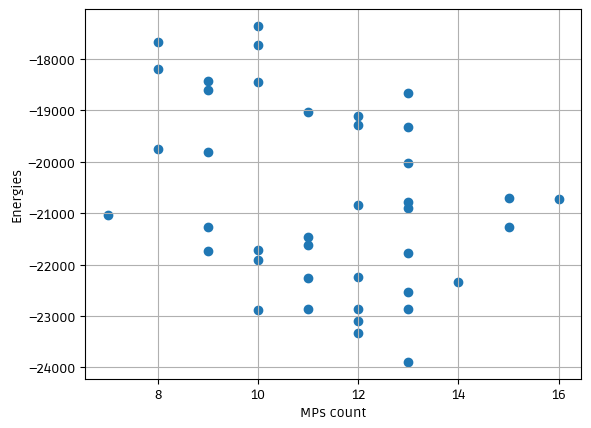

In [97]:
plt.scatter(mps_list,energias)
plt.xlabel('MPs count'),plt.ylabel('Energies'),plt.grid()
plt.show()

In [6]:
plt.hist(energias)


NameError: name 'energias' is not defined